Проводим разведывательный анализ данных в train.csv


In [185]:
!pip install pandas matplotlib seaborn

In [186]:
# загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Проводим подгрузку данных и вывод первых строк датафрейма


In [195]:
# Загрузка данных
df = pd.read_csv('train.csv')

# Посмотрим на первые 5 строк и выведем общую информацию о датафрейме
print(df.head())
print(df.info())

  Unnamed: 0                                               Text  \
0          0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1          1  advice Talk to your neighbours family to excha...   
2          2  Coronavirus Australia: Woolworths to give elde...   
3          3  My food stock is not the only one which is emp...   
4          4  Me, ready to go at supermarket during the #COV...   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41159 entries, 0 to 41158
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  41158 non-null  object
 1   Text        41158 non-null  object
 2   Sentiment   41155 non-null  object
dtypes: object(3)
memory usage: 964.8+ KB
None


Проводим предварительный анализ, чтобы понять структуру данных, типы переменных и наличие пропущенных значений и количество колонок (в данном сете их всего три).

In [188]:
# Общая информация о данных
print(df.info())

# Проверяем на наличие пропущенных значений
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41159 entries, 0 to 41158
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  41158 non-null  object
 1   Text        41158 non-null  object
 2   Sentiment   41155 non-null  object
dtypes: object(3)
memory usage: 964.8+ KB
None
Unnamed: 0    1
Text          1
Sentiment     4
dtype: int64


Пропущенных значений немного, можно в далнейшем их обработать, удалить все, что пропущено или имеет значние NaN

Проводим описательную статистику по числовым и категориальным переменным

In [189]:
# Описательная статистика
print(df.describe())

# Описание категориальных переменных
print(df['Sentiment'].value_counts())

       Unnamed: 0                                               Text Sentiment
count       41158                                              41158     41155
unique      41158                                              41158         5
top             0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive
freq            1                                                  1     11422
Sentiment
Positive              11422
Negative               9917
Neutral                7711
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


В датафрейме есклько вариантов окраски отзывов - позитивный, негативный, нейтральный, крайне негативный, крайне позитивный.


Проводим анализ классов целевой переменной - Sentiment

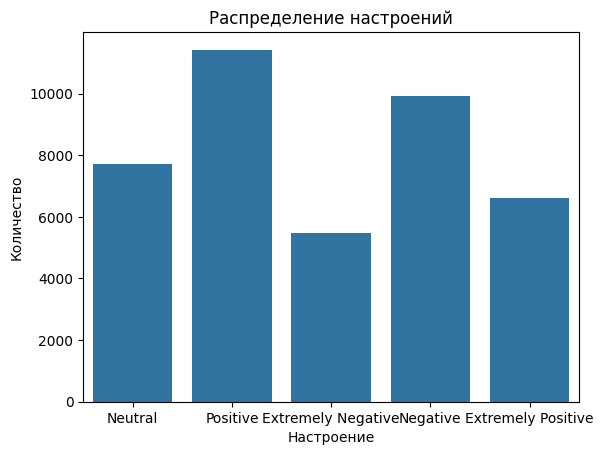

In [190]:
# Визуализация распределения настроений
sns.countplot(data=df, x='Sentiment')
plt.title('Распределение настроений')
plt.xlabel('Настроение')
plt.ylabel('Количество')
plt.show()

исходя из распередения очевидно, что положительных эмоций больше, чем остальных, при этом очень негативных также меньше, чем очень позитиынх. Обращает внимание, что масса отзывов имеют нейтральный оттенок, ровно между позитивом и негативом.

In [191]:
# Заполнение NaN значениями по умолчанию (например, 'отсутствует') перед конвертацией
df['Text'] = df['Text'].fillna('отсутствует').astype(str)

# Проверка типа данных после конвертации
print(df['Text'].dtype)

object


Испльзуем облака слов, для визуализации

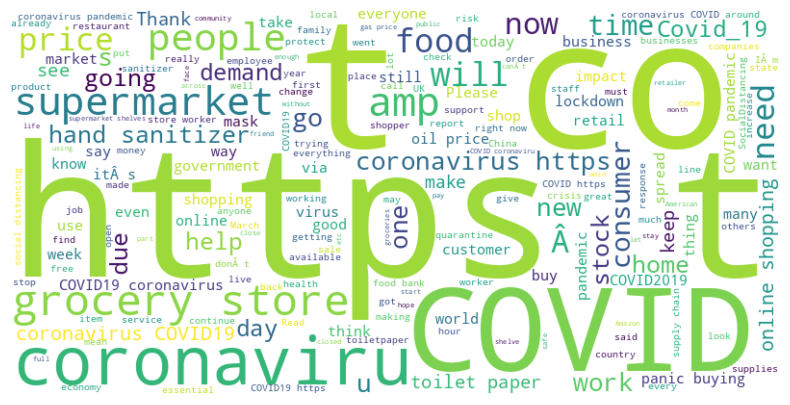

In [192]:
from wordcloud import WordCloud

# Объединим все тексты в одну строку
text = ' '.join(df['Text'])

# Генерируем облако слов

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Показать облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.show()

Из облака слов видно, что чаще всего встречаются слова о ковиде, адресе или ссылке, начинающиеся с HTTPS, также слова о людях и супермаркетах. Поэтому возникает гепотиза о том, что есть написать текст про Ковид, то высока вероятность, что он будет иметь оценку как "негативный".

Проведем обучение модели, используя Scikti-Learn, воспользуемся TF-IDF (Term Frequency-Inverse Document Frequency) векторизацией и


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [202]:
# Отфильтровываем только негативные и положительные отзывы
df = df[df['Sentiment'].isin(['Negative', 'Positive'])]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Создание пайплайна для векторизации и классификации
model = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Отчет о классификации
print(classification_report(y_test, predictions))

# Предсказания вероятности на новом тексте
new_text = ["I'm really worried about the shortages in stores during this pandemic."]
probabilities = model.predict_proba(new_text)

# Печать вероятности негативного отзыва
print(f'Вероятность негативного отзыва: {probabilities[0][0]}')  # Вероятность негативного отзыва
print(f'Вероятность положительного отзыва: {probabilities[0][1]}')  # Вероятность положительного отзыва

              precision    recall  f1-score   support

    Negative       0.79      0.71      0.75      1987
    Positive       0.77      0.83      0.80      2281

    accuracy                           0.78      4268
   macro avg       0.78      0.77      0.77      4268
weighted avg       0.78      0.78      0.77      4268

Вероятность негативного отзыва: 0.8813929209051787
Вероятность положительного отзыва: 0.11860707909482124


Accuracy  получен достаточно высокий, 0.78, что говорит о высоком качестве полученной модели